# Лабораторна робота 1

З генеральної сукупності взято вибірку:

In [1]:
import numpy as np

l = """
3 7 4 6 1 4 2 4 6 5 3 2 9 0 5 6 7 7 3 1
5 5 4 2 6 2 1 5 3 3 1 5 6 4 4 3 4 1 5 5
3 4 3 7 4 5 6 7 5 2 4 6 6 7 7 3 5 4 4 3
5 5 7 6 6 1 """
a = [int(s) for s in l.split()]
an = np.array(a)
an

array([3, 7, 4, 6, 1, 4, 2, 4, 6, 5, 3, 2, 9, 0, 5, 6, 7, 7, 3, 1, 5, 5, 4,
       2, 6, 2, 1, 5, 3, 3, 1, 5, 6, 4, 4, 3, 4, 1, 5, 5, 3, 4, 3, 7, 4, 5,
       6, 7, 5, 2, 4, 6, 6, 7, 7, 3, 5, 4, 4, 3, 5, 5, 7, 6, 6, 1])

Сумма генеральної сукупності

In [2]:
an.sum()

284

In [3]:
sum(a)

284

1) Запишемо варіаційний ряд

абсолютні частоти

In [4]:
import collections
counter = collections.Counter(an)
l_keys = list(counter.keys())
l_values = list(counter.values()) 
print(l_keys)
print(l_values)

[0, 1, 2, 3, 4, 5, 6, 7, 9]
[1, 6, 5, 10, 12, 13, 10, 8, 1]


In [5]:
hist, bin_edges = np.histogram(an)
print(np.unique(an))
print(hist)

[0 1 2 3 4 5 6 7 9]
[ 1  6  5 10 12 13 10  8  0  1]


In [6]:
ls = []
print(list(set(an)))
for j in list(set(an)):
    ls.append(np.count_nonzero(an == j))
print(ls)

[0, 1, 2, 3, 4, 5, 6, 7, 9]
[1, 6, 5, 10, 12, 13, 10, 8, 1]


In [7]:
from itertools import groupby
freq = {key:len(list(group)) for key, group in groupby(np.sort(an))}
print(freq)
print(list(freq.keys()))
print(list(freq.values()))

{0: 1, 1: 6, 2: 5, 3: 10, 4: 12, 5: 13, 6: 10, 7: 8, 9: 1}
[0, 1, 2, 3, 4, 5, 6, 7, 9]
[1, 6, 5, 10, 12, 13, 10, 8, 1]


2) Обчислимо моду

In [8]:
from statistics import mode
mode(an)

5

In [9]:
repeticiones = 0
for i in a:
    apariciones = a.count(i)
    if apariciones > repeticiones:
        repeticiones = apariciones

modas = []
for i in a:
    apariciones = a.count(i)
    if apariciones == repeticiones and i not in modas:
        modas.append(i)

print(modas)

[5]


In [10]:
counts = np.bincount(an)
print(np.argmax(counts))

5


Медіана

In [11]:
from statistics import median
print(np.median(an))
print(median(an))

4.0
4.0


Варіаційний ряд відносних частот

In [12]:
print(l_keys)
print(l_values)
l_rel =[]
for i in l_values:
    l_rel.append(round(i / len(an), 3))
print(l_rel)

[0, 1, 2, 3, 4, 5, 6, 7, 9]
[1, 6, 5, 10, 12, 13, 10, 8, 1]
[0.015, 0.091, 0.076, 0.152, 0.182, 0.197, 0.152, 0.121, 0.015]


In [13]:
print(l_keys)
print(l_values)
l_rel =[]
for i in l_values:
    l_rel.append(i / len(a))
print(np.array(l_rel))

[0, 1, 2, 3, 4, 5, 6, 7, 9]
[1, 6, 5, 10, 12, 13, 10, 8, 1]
[ 0.01515152  0.09090909  0.07575758  0.15151515  0.18181818  0.1969697
  0.15151515  0.12121212  0.01515152]


Гістограма та полігон абсолютних частот

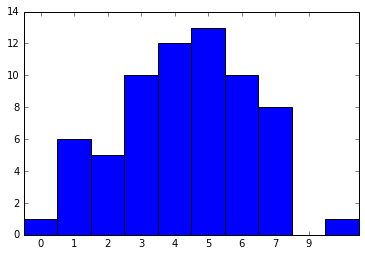

In [34]:
import matplotlib.pyplot as plt
width = 1
plt.bar(list(counter), l_values, width)
plt.xticks(np.arange(len(l_keys)) + width * 0.5, l_keys)
plt.show()

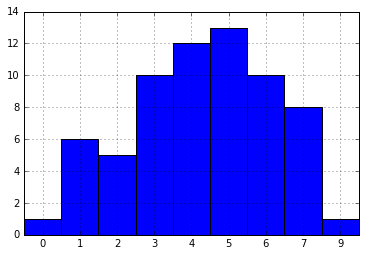

In [15]:
from collections import Counter
labels, values = zip(*Counter(a).items())
indexes = np.arange(len(labels))
width = 1
plt.grid(True)
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

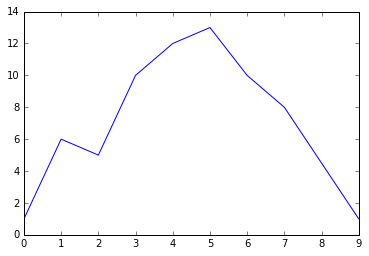

In [16]:
plt.plot(list(counter.keys()), values)
plt.show()

In [17]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
iplot([{"x": list(counter), "y": l_values}])

Гістограма та полігон відносних частот

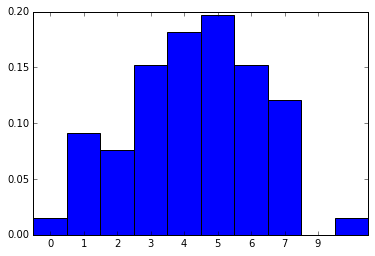

In [32]:
plt.bar(list(counter), l_rel, width)
plt.xticks(np.arange(len(l_keys)) + width * 0.5, l_keys)
plt.show()

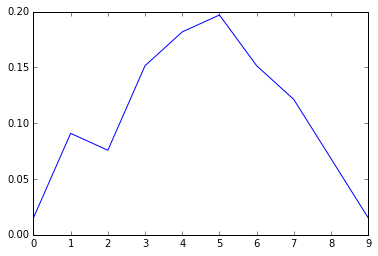

In [19]:
plt.plot(list(counter.keys()), l_rel)
plt.show()

In [20]:
init_notebook_mode(connected=True)
iplot([{"x": list(counter.keys()), "y": l_rel}])

4.1) Вибіркове середнє є незміщеною оцінкою генерального середнього і обчислюються за формулою.
Sample mean and covariance

In [21]:
from statistics import mean
print(mean(a))
print(np.mean(an))

4.303030303030303
4.30303030303


4.2) Знайдемо незміщену оцінку генеральної дисперсії та середнього квадратичного відхилення:

sample variance

In [22]:
from statistics import variance
print(variance((a)))
print(np.cov(an))

3.752913752913753
3.752913752913753


Знайдемо середнє відхилення.


mean absolute deviation MAD

In [23]:
n = float(len(an))
mean = sum(an) / n
diff = [abs(x - mean) for x in an]
sum(diff) / n

1.5849403122130399

sqrt(Db)

In [24]:
from statistics import pvariance
from math import sqrt
print(sqrt(pvariance((a))))
print(sqrt(np.var(an)))

1.9225117485529577
1.9225117485529575


Знайдемо коефіцієнт варіації V 

Statistical dispersion

In [25]:
print((sqrt(np.var(an)) / np.mean(an)) )

0.446780899312


Накопичені частоти сортовані

In [26]:
ls = []
print(l_rel)
for i in range(len(l_rel)):
    ls.append(sum(l_rel[i:len(l_rel)]))
ls.reverse()

[0.015151515151515152, 0.09090909090909091, 0.07575757575757576, 0.15151515151515152, 0.18181818181818182, 0.19696969696969696, 0.15151515151515152, 0.12121212121212122, 0.015151515151515152]


Накопичені частоти

In [27]:
cumulative_frequencies = np.cumsum(l_rel).round(3)
cumulative_frequencies

array([ 0.015,  0.106,  0.182,  0.333,  0.515,  0.712,  0.864,  0.985,  1.   ])

Складемо другу статистичну таблицю

In [30]:
l_rel = np.array(l_rel).round(3)
import pandas as pd
x = pd.DataFrame({'Варіанта': range(len(l_keys)), 'Абсолютні частоти': list(counter.values()),
                  'Відносні частоти': l_rel, 
                  'Накопичені частоти': cumulative_frequencies})
x

,Абсолютні частоти,Варіанта,Відносні частоти,Накопичені частоти
0,1,0,0.015,0.015
1,6,1,0.091,0.106
2,5,2,0.076,0.182
3,10,3,0.152,0.333
4,12,4,0.182,0.515
5,13,5,0.197,0.712
6,10,6,0.152,0.864
7,8,7,0.121,0.985
8,1,8,0.015,1.000
